## Parameter Configuration

In [1]:
import sys
import numpy as np
import pandas as pd

from fairsearchcore.models import FairScoreDoc
import fairsearchcore as fsc
from codes.alg import FPRank, FSPR_model, best_FPRank
from codes.metrics import evaluate

######################################################################
# Column names
######################################################################

data = 'ICLR2020'
prt_attr = 'famous'
class_attr = 'h_c'
score_attr = 's'

######################################################################
# Configuration parameters
######################################################################

numBins = 10
bin_width = 0.1
score_norm = 10

filename = 'data/' + data
output_file = './results/' + data

## Loading Data

Min acceptability score = 0.1000, Max acceptability score = 0.8000


<AxesSubplot: xlabel='Class'>

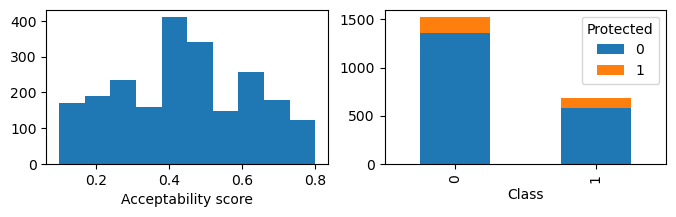

In [2]:
from codes.data_loader import load_data
import matplotlib.pyplot as plt

adj, data, W, s, y, prt = load_data(filename, class_attr, score_attr, prt_attr, score_norm = score_norm)
print('Min acceptability score = {:.4f}, Max acceptability score = {:.4f}'.format(np.min(s), np.max(s)))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,2))
ax1.hist(s)
ax1.set_xlabel('Acceptability score')

df = pd.DataFrame({'Class': y, 'Protected': prt}, dtype='int')
df.groupby(['Class', 'Protected']).size().unstack().plot(ax=ax2, kind='bar', stacked=True)

Total number of nodes = 2212
Number of isolated nodes = 369


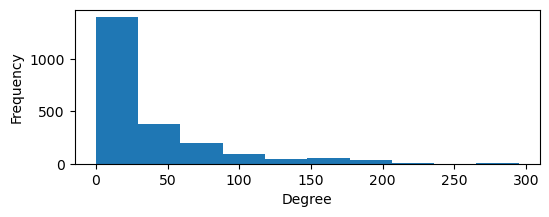

In [3]:
degrees = adj.sum(axis=1)
plt.figure(figsize=(6,2))
plt.hist(degrees)
plt.xlabel('Degree')
plt.ylabel('Frequency')

print('Total number of nodes =', degrees.shape[0])
print('Number of isolated nodes =', sum(degrees==0))

## Results for No Calibration

Results for No Calibration

  prec: 0.891716 |  Rank corr: 1.000000  | fp: 0.596745 | wsd: 0.000004 | wrd: 0.000015


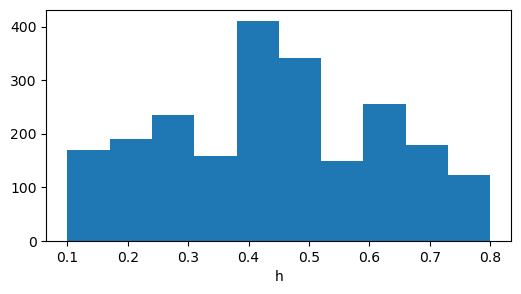

In [4]:
print('Results for No Calibration')
evaluate(s, y, s, prt, W, numBins = numBins, bin_width = bin_width)
out_df = pd.DataFrame({'h': s, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_Nocal.csv', index = False)

## Results for FPRank

In [5]:
results, params  = FPRank(W, s, y, prt, numBins = numBins, bin_width=bin_width)
out_df = pd.DataFrame(results)
out_df.to_csv(output_file + '_FPresults.csv', index=False)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  alpha=0.0100, beta=0.1000: prec=0.9093, corr=0.9959, fp=0.5936, wsd=0.000004, wrd=0.000010
  alpha=0.0100, beta=0.1624: prec=0.9093, corr=0.9959, fp=0.5927, wsd=0.000004, wrd=0.000010
  alpha=0.0100, beta=0.2637: prec=0.9093, corr=0.9959, fp=0.5922, wsd=0.000004, wrd=0.000010
  alpha=0.0100, beta=0.4281: prec=0.9093, corr=0.9959, fp=0.5909, wsd=0.000004, wrd=0.000010
  alpha=0.0100, beta=0.6952: prec=0.9093, corr=0.9959, fp=0.5900, wsd=0.000004, wrd=0.000010
  alpha=0.0100, beta=1.1288: prec=0.9090, corr=0.9958, fp=0.5877, wsd=0.000004, wrd=0.000009
  alpha=0.0100, beta=1.8330: prec=0.9088, corr=0.9952, fp=0.5814, wsd=0.000005, wrd=0.000010
  alpha=0.0100, beta=2.9764: prec=0.9074, corr=0.9928, fp=0.5750, wsd=0.000010, wrd=0.000011
  alpha=0.0100, beta=4.8329: prec=0.9015, corr=0.9844, fp=0.5583, wsd=0.000027, wrd=0.000017
  alpha=0.0100, beta=7.8476: prec=0.8851, corr=0.9591, fp=0.5298, wsd=0.000081, wrd=0.000060
  alpha=0.0100, beta=12.7427: prec=0.8446, corr=0.8881, fp=0.4869, wsd

 10%|████████▎                                                                          | 1/10 [00:55<08:17, 55.26s/it]

  alpha=0.0100, beta=1000.0000: prec=0.4879, corr=0.3060, fp=0.2116, wsd=0.000561, wrd=0.000933
  alpha=0.0278, beta=0.1000: prec=0.9093, corr=0.9959, fp=0.5936, wsd=0.000004, wrd=0.000010
  alpha=0.0278, beta=0.1624: prec=0.9093, corr=0.9959, fp=0.5927, wsd=0.000004, wrd=0.000010
  alpha=0.0278, beta=0.2637: prec=0.9093, corr=0.9959, fp=0.5922, wsd=0.000004, wrd=0.000010
  alpha=0.0278, beta=0.4281: prec=0.9094, corr=0.9959, fp=0.5909, wsd=0.000004, wrd=0.000010
  alpha=0.0278, beta=0.6952: prec=0.9094, corr=0.9959, fp=0.5900, wsd=0.000004, wrd=0.000010
  alpha=0.0278, beta=1.1288: prec=0.9090, corr=0.9958, fp=0.5877, wsd=0.000004, wrd=0.000009
  alpha=0.0278, beta=1.8330: prec=0.9088, corr=0.9952, fp=0.5814, wsd=0.000005, wrd=0.000010
  alpha=0.0278, beta=2.9764: prec=0.9074, corr=0.9928, fp=0.5750, wsd=0.000010, wrd=0.000011
  alpha=0.0278, beta=4.8329: prec=0.9015, corr=0.9844, fp=0.5583, wsd=0.000026, wrd=0.000017
  alpha=0.0278, beta=7.8476: prec=0.8851, corr=0.9591, fp=0.5298, w

 20%|████████████████▌                                                                  | 2/10 [01:57<07:53, 59.23s/it]

  alpha=0.0278, beta=1000.0000: prec=0.4875, corr=0.3059, fp=0.2057, wsd=0.000561, wrd=0.000938
  alpha=0.0774, beta=0.1000: prec=0.9092, corr=0.9959, fp=0.5936, wsd=0.000004, wrd=0.000009
  alpha=0.0774, beta=0.1624: prec=0.9093, corr=0.9959, fp=0.5927, wsd=0.000004, wrd=0.000010
  alpha=0.0774, beta=0.2637: prec=0.9093, corr=0.9959, fp=0.5922, wsd=0.000004, wrd=0.000010
  alpha=0.0774, beta=0.4281: prec=0.9093, corr=0.9959, fp=0.5909, wsd=0.000004, wrd=0.000010
  alpha=0.0774, beta=0.6952: prec=0.9093, corr=0.9959, fp=0.5900, wsd=0.000004, wrd=0.000010
  alpha=0.0774, beta=1.1288: prec=0.9090, corr=0.9958, fp=0.5877, wsd=0.000004, wrd=0.000009
  alpha=0.0774, beta=1.8330: prec=0.9088, corr=0.9952, fp=0.5814, wsd=0.000005, wrd=0.000010
  alpha=0.0774, beta=2.9764: prec=0.9074, corr=0.9928, fp=0.5750, wsd=0.000010, wrd=0.000011
  alpha=0.0774, beta=4.8329: prec=0.9015, corr=0.9844, fp=0.5583, wsd=0.000026, wrd=0.000017
  alpha=0.0774, beta=7.8476: prec=0.8851, corr=0.9591, fp=0.5298, w

 30%|████████████████████████▉                                                          | 3/10 [02:55<06:51, 58.81s/it]

  alpha=0.0774, beta=1000.0000: prec=0.4877, corr=0.3061, fp=0.2061, wsd=0.000559, wrd=0.000927
  alpha=0.2154, beta=0.1000: prec=0.9092, corr=0.9959, fp=0.5936, wsd=0.000004, wrd=0.000009
  alpha=0.2154, beta=0.1624: prec=0.9092, corr=0.9959, fp=0.5927, wsd=0.000004, wrd=0.000009
  alpha=0.2154, beta=0.2637: prec=0.9093, corr=0.9959, fp=0.5922, wsd=0.000004, wrd=0.000009
  alpha=0.2154, beta=0.4281: prec=0.9093, corr=0.9959, fp=0.5909, wsd=0.000004, wrd=0.000010
  alpha=0.2154, beta=0.6952: prec=0.9093, corr=0.9959, fp=0.5900, wsd=0.000003, wrd=0.000009
  alpha=0.2154, beta=1.1288: prec=0.9090, corr=0.9958, fp=0.5877, wsd=0.000004, wrd=0.000009
  alpha=0.2154, beta=1.8330: prec=0.9088, corr=0.9952, fp=0.5814, wsd=0.000005, wrd=0.000010
  alpha=0.2154, beta=2.9764: prec=0.9073, corr=0.9928, fp=0.5750, wsd=0.000010, wrd=0.000011
  alpha=0.2154, beta=4.8329: prec=0.9015, corr=0.9844, fp=0.5583, wsd=0.000026, wrd=0.000017
  alpha=0.2154, beta=7.8476: prec=0.8851, corr=0.9591, fp=0.5298, w

 40%|█████████████████████████████████▏                                                 | 4/10 [03:50<05:42, 57.13s/it]

  alpha=0.2154, beta=1000.0000: prec=0.4875, corr=0.3060, fp=0.2043, wsd=0.000555, wrd=0.000942
  alpha=0.5995, beta=0.1000: prec=0.9093, corr=0.9959, fp=0.5936, wsd=0.000004, wrd=0.000008
  alpha=0.5995, beta=0.1624: prec=0.9093, corr=0.9959, fp=0.5927, wsd=0.000004, wrd=0.000009
  alpha=0.5995, beta=0.2637: prec=0.9093, corr=0.9959, fp=0.5922, wsd=0.000004, wrd=0.000009
  alpha=0.5995, beta=0.4281: prec=0.9093, corr=0.9959, fp=0.5909, wsd=0.000004, wrd=0.000009
  alpha=0.5995, beta=0.6952: prec=0.9093, corr=0.9959, fp=0.5900, wsd=0.000003, wrd=0.000009
  alpha=0.5995, beta=1.1288: prec=0.9090, corr=0.9958, fp=0.5877, wsd=0.000004, wrd=0.000009
  alpha=0.5995, beta=1.8330: prec=0.9088, corr=0.9952, fp=0.5814, wsd=0.000005, wrd=0.000010
  alpha=0.5995, beta=2.9764: prec=0.9074, corr=0.9928, fp=0.5750, wsd=0.000009, wrd=0.000011
  alpha=0.5995, beta=4.8329: prec=0.9015, corr=0.9844, fp=0.5583, wsd=0.000024, wrd=0.000016
  alpha=0.5995, beta=7.8476: prec=0.8851, corr=0.9591, fp=0.5298, w

 50%|█████████████████████████████████████████▌                                         | 5/10 [04:42<04:37, 55.43s/it]

  alpha=0.5995, beta=1000.0000: prec=0.4875, corr=0.3060, fp=0.2061, wsd=0.000543, wrd=0.000936
  alpha=1.6681, beta=0.1000: prec=0.9094, corr=0.9959, fp=0.5936, wsd=0.000004, wrd=0.000007
  alpha=1.6681, beta=0.1624: prec=0.9094, corr=0.9959, fp=0.5927, wsd=0.000004, wrd=0.000007
  alpha=1.6681, beta=0.2637: prec=0.9093, corr=0.9959, fp=0.5922, wsd=0.000004, wrd=0.000008
  alpha=1.6681, beta=0.4281: prec=0.9094, corr=0.9959, fp=0.5909, wsd=0.000003, wrd=0.000008
  alpha=1.6681, beta=0.6952: prec=0.9094, corr=0.9959, fp=0.5895, wsd=0.000003, wrd=0.000009
  alpha=1.6681, beta=1.1288: prec=0.9090, corr=0.9958, fp=0.5877, wsd=0.000003, wrd=0.000008
  alpha=1.6681, beta=1.8330: prec=0.9088, corr=0.9952, fp=0.5814, wsd=0.000004, wrd=0.000009
  alpha=1.6681, beta=2.9764: prec=0.9074, corr=0.9928, fp=0.5750, wsd=0.000008, wrd=0.000010
  alpha=1.6681, beta=4.8329: prec=0.9015, corr=0.9844, fp=0.5583, wsd=0.000021, wrd=0.000016
  alpha=1.6681, beta=7.8476: prec=0.8852, corr=0.9591, fp=0.5303, w

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [05:35<03:37, 54.44s/it]

  alpha=1.6681, beta=1000.0000: prec=0.4872, corr=0.3058, fp=0.2071, wsd=0.000512, wrd=0.000949
  alpha=4.6416, beta=0.1000: prec=0.9099, corr=0.9959, fp=0.5936, wsd=0.000003, wrd=0.000011
  alpha=4.6416, beta=0.1624: prec=0.9096, corr=0.9959, fp=0.5927, wsd=0.000003, wrd=0.000007
  alpha=4.6416, beta=0.2637: prec=0.9095, corr=0.9959, fp=0.5922, wsd=0.000003, wrd=0.000006
  alpha=4.6416, beta=0.4281: prec=0.9094, corr=0.9959, fp=0.5909, wsd=0.000003, wrd=0.000007
  alpha=4.6416, beta=0.6952: prec=0.9094, corr=0.9959, fp=0.5895, wsd=0.000003, wrd=0.000007
  alpha=4.6416, beta=1.1288: prec=0.9090, corr=0.9958, fp=0.5877, wsd=0.000003, wrd=0.000007
  alpha=4.6416, beta=1.8330: prec=0.9087, corr=0.9952, fp=0.5814, wsd=0.000004, wrd=0.000009
  alpha=4.6416, beta=2.9764: prec=0.9074, corr=0.9928, fp=0.5750, wsd=0.000006, wrd=0.000009
  alpha=4.6416, beta=4.8329: prec=0.9015, corr=0.9844, fp=0.5583, wsd=0.000015, wrd=0.000015
  alpha=4.6416, beta=7.8476: prec=0.8852, corr=0.9591, fp=0.5307, w

 70%|██████████████████████████████████████████████████████████                         | 7/10 [06:27<02:41, 53.71s/it]

  alpha=4.6416, beta=1000.0000: prec=0.4876, corr=0.3064, fp=0.2134, wsd=0.000439, wrd=0.000969
  alpha=12.9155, beta=0.1000: prec=0.9105, corr=0.9959, fp=0.5936, wsd=0.000003, wrd=0.000042
  alpha=12.9155, beta=0.1624: prec=0.9102, corr=0.9959, fp=0.5927, wsd=0.000002, wrd=0.000018
  alpha=12.9155, beta=0.2637: prec=0.9099, corr=0.9959, fp=0.5922, wsd=0.000002, wrd=0.000009
  alpha=12.9155, beta=0.4281: prec=0.9097, corr=0.9959, fp=0.5909, wsd=0.000002, wrd=0.000005
  alpha=12.9155, beta=0.6952: prec=0.9095, corr=0.9959, fp=0.5895, wsd=0.000002, wrd=0.000005
  alpha=12.9155, beta=1.1288: prec=0.9091, corr=0.9958, fp=0.5877, wsd=0.000002, wrd=0.000005
  alpha=12.9155, beta=1.8330: prec=0.9088, corr=0.9952, fp=0.5814, wsd=0.000003, wrd=0.000007
  alpha=12.9155, beta=2.9764: prec=0.9074, corr=0.9928, fp=0.5750, wsd=0.000004, wrd=0.000007
  alpha=12.9155, beta=4.8329: prec=0.9016, corr=0.9844, fp=0.5583, wsd=0.000009, wrd=0.000013
  alpha=12.9155, beta=7.8476: prec=0.8853, corr=0.9591, fp

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [07:18<01:45, 52.77s/it]

  alpha=12.9155, beta=1000.0000: prec=0.4874, corr=0.3065, fp=0.2193, wsd=0.000302, wrd=0.000971
  alpha=35.9381, beta=0.1000: prec=0.9108, corr=0.9959, fp=0.5936, wsd=0.000002, wrd=0.000073
  alpha=35.9381, beta=0.1624: prec=0.9108, corr=0.9959, fp=0.5927, wsd=0.000002, wrd=0.000057
  alpha=35.9381, beta=0.2637: prec=0.9104, corr=0.9959, fp=0.5922, wsd=0.000002, wrd=0.000030
  alpha=35.9381, beta=0.4281: prec=0.9102, corr=0.9959, fp=0.5909, wsd=0.000001, wrd=0.000011
  alpha=35.9381, beta=0.6952: prec=0.9099, corr=0.9959, fp=0.5895, wsd=0.000001, wrd=0.000005
  alpha=35.9381, beta=1.1288: prec=0.9094, corr=0.9958, fp=0.5877, wsd=0.000002, wrd=0.000003
  alpha=35.9381, beta=1.8330: prec=0.9090, corr=0.9952, fp=0.5814, wsd=0.000002, wrd=0.000004
  alpha=35.9381, beta=2.9764: prec=0.9075, corr=0.9928, fp=0.5750, wsd=0.000002, wrd=0.000004
  alpha=35.9381, beta=4.8329: prec=0.9017, corr=0.9844, fp=0.5579, wsd=0.000004, wrd=0.000009
  alpha=35.9381, beta=7.8476: prec=0.8854, corr=0.9592, f

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [08:12<00:53, 53.19s/it]

  alpha=35.9381, beta=1000.0000: prec=0.4867, corr=0.3070, fp=0.2084, wsd=0.000143, wrd=0.001030
  alpha=100.0000, beta=0.1000: prec=0.9109, corr=0.9959, fp=0.5936, wsd=0.000001, wrd=0.000103
  alpha=100.0000, beta=0.1624: prec=0.9107, corr=0.9959, fp=0.5927, wsd=0.000001, wrd=0.000080
  alpha=100.0000, beta=0.2637: prec=0.9107, corr=0.9959, fp=0.5922, wsd=0.000001, wrd=0.000060
  alpha=100.0000, beta=0.4281: prec=0.9105, corr=0.9959, fp=0.5909, wsd=0.000001, wrd=0.000030
  alpha=100.0000, beta=0.6952: prec=0.9100, corr=0.9959, fp=0.5895, wsd=0.000001, wrd=0.000010
  alpha=100.0000, beta=1.1288: prec=0.9096, corr=0.9958, fp=0.5882, wsd=0.000001, wrd=0.000004
  alpha=100.0000, beta=1.8330: prec=0.9092, corr=0.9952, fp=0.5818, wsd=0.000001, wrd=0.000002
  alpha=100.0000, beta=2.9764: prec=0.9077, corr=0.9928, fp=0.5750, wsd=0.000001, wrd=0.000002
  alpha=100.0000, beta=4.8329: prec=0.9018, corr=0.9844, fp=0.5579, wsd=0.000002, wrd=0.000004
  alpha=100.0000, beta=7.8476: prec=0.8858, corr

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:05<00:00, 54.50s/it]

  alpha=100.0000, beta=1000.0000: prec=0.4855, corr=0.3066, fp=0.2211, wsd=0.000046, wrd=0.001053


Range of evaluation measures:
   Precision: 0.4854580493633326 0.9108671380877622
   Fairness perception: 0.20433996383363473 0.5935804701627486
   WSD: 0.000817566369771162 6.224269949990445e-07
   WRD: 0.0023526891501870722 1.6155801903255355e-06

Best parameters: alpha = 1.6681, beta = 0.1000 (util = 0.9014)

Result for FPRank:

  prec: 0.909428 |  Rank corr: 0.995913  | fp: 0.593580 | wsd: 0.000004 | wrd: 0.000007


{'precision': 0.9094281911391711,
 'corr': 0.9959126130794506,
 'fairperception': 0.5935804701627486,
 'wsd': 3.741829755551785e-06,
 'wrd': 6.882535076850136e-06}

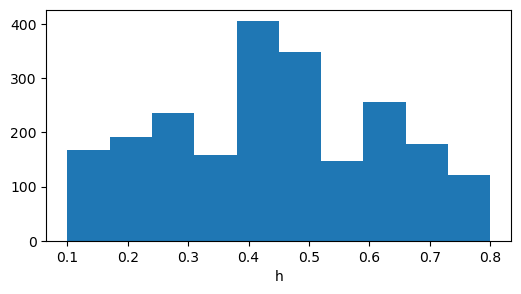

In [6]:
print('Range of evaluation measures:')
print('   Precision:', np.min(results['precision']), np.max(results['precision']))
print('   Fairness perception:', np.min(results['fairperception']), np.max(results['fairperception']))
print('   WSD:', np.max(results['wsd']), np.min(results['wsd']))
print('   WRD:', np.max(results['wrd']), np.min(results['wrd']))

h, bestparam, utils = best_FPRank(results, params)
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FPRank.csv', index = False)
print('\nResult for FPRank:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for InFoRM

Require InFoRM package that can be downloaded from https://github.com/jiank2/inform

In [7]:
from InFoRM import utils
from InFoRM.method.debias_model import DebiasModel
from scipy.sparse import csc_matrix

def debias_mining_model(adj, s, alpha=0., metric='cosine'):
    # init params
    c = 0.85

    sp_adj = csc_matrix(adj)
    adj = utils.symmetric_normalize(sp_adj)
    
    # build similarity matrix
    sim = utils.filter_similarity_matrix(utils.get_similarity_matrix(adj, metric=metric), sigma=0.75)
    sim = utils.symmetric_normalize(sim)

    # debias pagerank
    FairModel = DebiasModel()
    
    personalization = s.reshape(-1,1)
    personalization = personalization/personalization.sum()
    
    r = FairModel.pagerank(adj, sim, alpha, c=c, personalization=personalization)
    r = np.array([list(r.values())])
    r = csc_matrix(np.array(r).transpose())

    return r


  prec: 0.368886 |  Rank corr: 0.169911  | fp: 0.351266 | wsd: 0.000000 | wrd: 0.003831


{'precision': 0.3688856840988214,
 'corr': 0.16991120177324226,
 'fairperception': 0.3512658227848101,
 'wsd': 1.4970675861535927e-09,
 'wrd': 0.003831290265554131}

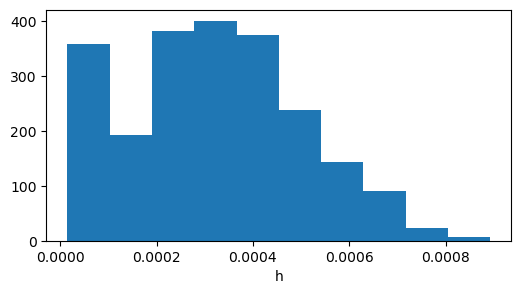

In [8]:
h = debias_mining_model(adj, s).toarray().flatten()
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_INFORM.csv', index = False)
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FSPR

     pcost       dcost       gap    pres   dres
 0: -6.8572e+01 -3.3320e+03  2e+04  2e+00  2e-15
 1: -1.4570e+01 -1.3471e+03  2e+03  1e-01  1e-15
 2: -1.1503e+00 -4.7676e+01  6e+01  3e-03  1e-15
 3: -8.5094e-01 -2.9713e+00  2e+00  3e-05  1e-15
 4: -8.6844e-01 -1.5040e+00  6e-01  9e-06  2e-15
 5: -9.0258e-01 -1.5343e+00  6e-01  8e-06  1e-15
 6: -9.3767e-01 -1.5581e+00  6e-01  7e-06  1e-15
 7: -1.1226e+00 -1.3846e+00  3e-01  7e-07  8e-16
 8: -1.1713e+00 -1.3287e+00  2e-01  7e-08  5e-16
 9: -1.1730e+00 -1.3186e+00  1e-01  3e-08  4e-16
10: -1.2233e+00 -1.2432e+00  2e-02  3e-09  6e-16
11: -1.2300e+00 -1.2337e+00  4e-03  5e-10  6e-16
12: -1.2300e+00 -1.2331e+00  3e-03  6e-16  4e-16
13: -1.2315e+00 -1.2316e+00  9e-05  4e-16  6e-16
14: -1.2315e+00 -1.2315e+00  4e-06  2e-16  9e-16
15: -1.2315e+00 -1.2315e+00  2e-07  2e-16  2e-15
Optimal solution found.

  prec: 0.715666 |  Rank corr: 0.635758  | fp: 0.669982 | wsd: 0.000004 | wrd: 0.009815


{'precision': 0.7156659129920099,
 'corr': 0.6357583759111017,
 'fairperception': 0.6699819168173599,
 'wsd': 4.232465733985247e-06,
 'wrd': 0.009814535806562594}

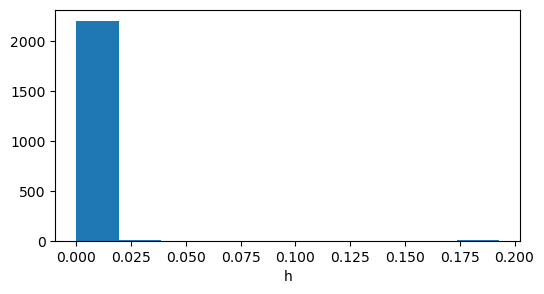

In [9]:
h = FSPR_model(adj, s, prt)
out_df = pd.DataFrame({'h': h.ravel(), prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FSPR.csv', index = False)
evaluate(h.ravel(), y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FairTopk

Require fairsearchcore library from https://github.com/fair-search/fairsearch-fair-python

D:\Anaconda\envs\fprank\lib\site-packages\fairsearchcore\fair.py:165: UserWarning: Library has not been tested with values outside this range
  warnings.warn("Library has not been tested with values outside this range")


Result for FairTopK:

  prec: 0.844915 |  Rank corr: 0.819428  | fp: 0.490958 | wsd: 0.001958 | wrd: 0.001249


{'precision': 0.8449149486604066,
 'corr': 0.8194276132813948,
 'fairperception': 0.4909584086799277,
 'wsd': 0.001957738744296825,
 'wrd': 0.0012486095589525148}

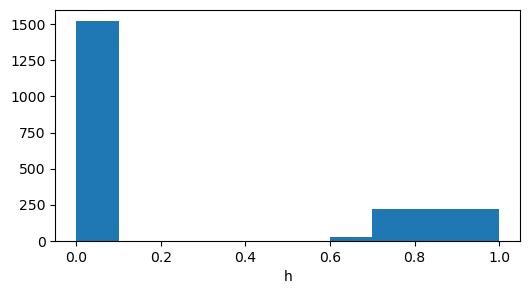

In [10]:
from codes.data_loader import load_data_fairtopk

rankings, k, p, data = load_data_fairtopk(filename, class_attr, score_attr, prt_attr, factor=1)

alpha = 0.1
fair = fsc.Fair(k, p, alpha)
re_ranked = fair.re_rank(rankings)
eps = 1/len(rankings)
h = np.zeros(len(rankings))
for i,item in enumerate(re_ranked):
    h[item.id] = 1 - i*eps
out_df = pd.DataFrame({'h': h, prt_attr : data[prt_attr]})
out_df.to_csv(output_file + '_FairTopk.csv', index = False)

print('Result for FairTopK:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)